# Credit Card User Segmentation

### The Goal 
You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.  

### The Data 

The data consists of a csv file with 8950 rows (one for each cardholder) organized in columns with descriptive headers. 
- CUST_ID : Credit card holder ID 
- BALANCE : Monthly average balance (based on daily balance averages) 
- BALANCE_FREQUENCY : Ratio of last 12 months with balance 
- PURCHASES : Total purchase amount spent during last 12 months 
- ONEOFF_PURCHASES : Total amount of one-off purchases 
- INSTALLMENTS_PURCHASES : Total amount of installment purchases 
- CASH_ADVANCE : Total cash-advance amount 
- PURCHASES_ FREQUENCY : Frequency of purchases (percentage of months with at least one purchase) 
- ONEOFF_PURCHASES_FREQUENCY : Frequency of one-off-purchases 
- PURCHASES_INSTALLMENTS_FREQUENCY : Frequency of installment purchases 
- CASH_ADVANCE_ FREQUENCY : Cash-Advance frequency 
- CASH_ADVANCE_TRX : Number of cash-advance transactions 
- PURCHASES_TRX : Number of purchase transactions
- CREDIT_LIMIT : Credit limit 
- PAYMENTS : Total payments (due amount paid by the customer to decrease their statement balance) in the period 
- MINIMUM_PAYMENTS : Total minimum payments due in the period.  
- PRC_FULL_PAYMENT : Percentage of months with full payment of the due statement balance 
- TENURE : Number of months as a customer 


## Approach

* Perform customer-segmentation using unsupervised clustering.  
* Determine characteristics of different types of customers.  
* Suggest best offers for customers in each segment.

# Results

<b> we have 7 different clusters, and it seems that the clustering algorithm decided the customer segments based on customer behavior spicifically how they use their credit card ( for cash advances, one-off purchases or installment purchases).

## Group 0: Cash advance only customers (financially stressed)

These customers only used the credit card for cash advances. They have lower credit limits and they almost never pay in full and they regularly have a balance and their utilization ratio is very high. these customers are most probably financially stressed because cash advances are too expensive (with credit card fees, ATM fees and higher interest) and one would not use them unless they are in urgent need of cash and have no other means of getting that cash. 


Best offer: Simple and transparent fees, rates and terms, lower interest and flat fees for cash advances, introductory 0 APR for cash advances. 

## Group 1:  no cash advance and high frequency purchase customers

These customers use their credit card for both one-off and installment purchases very frequently, but never for cash advances. They almost always have a balance, but their balances are lower than most other customers. They have high credit limits and low utilization ratio, also they have the highest tenure. 

Best offer: as these customers use their credit cards very frequently for purchases offers like cash back rewards or points, are the best offers. offering the ability to turn a large purchase straight into a low-rate installment loan might also be attractive.


## Group 2: Customers who occasionally use their credit card and only for one-off purchases 

These customers use their credit card for only one-off purchases. They are less likely to have a balance,and their balances are low. They have relatively lower credit limits and low utilization ratio, and they seldom use their card. 

Best offer: these customers are not very active, the reasons may be that they have other credit cards with better rewards in that case rewardsand points might be attractive, or maybe they have bad credit and they are trying to recover their credit score by avoiding using their credit card, in that case maybe lower monthly payments, lower APR and less unexpected fees might be attractive offers.

## Group  3: Active customers who use their credit card for purchases and cash advance frequently

These customers use their credit card for one-off and installment purchases and for cash advances. They have the highest credit limits and they almost always have a balance. 

Best offer: general credit card benefits, lower APR, points, lower minimum payments, etc...

## Group  4: customers who use their credit card ONLY for installment purchases 

These customers use their credit card only for installment purchases. They have the lowest credit limits and they are more likely to pay their balance in full and have the lowest balances. they are very conservative in using a credit card and only use it for their big purchases and have the lowest utilization ratio.

Best offer: increasing credit limit, offering the ability to turn a large purchase straight into a low-rate installment loan

## Group  5: One-off purchase and cash advance customers

These customers use their credit card for one-off purchases and for cash advances, but never for installment purchases. They almost always have a balance and they never pay in full. they are infrequent users and have the lowest number of transactions.

Best offer: benefit related to one-off purchases like cash back rewards.


## Group 6: Customers who use their credit card for installment purchases and cash advance 

These customers use their credit card for installment purchases and cash advances. They have the highest utilization ratio. and like other cash advance users they never pay in full(probably because they are financially stressed).

Best offer: lower interest and flat fees for cash advances, offering the ability to turn a large purchase straight into a low-rate installment loan.

## Importing libraries and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 10)
import seaborn as sns

In [2]:
df = pd.read_excel('data/cc_info.xlsx')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## Visualizing the data

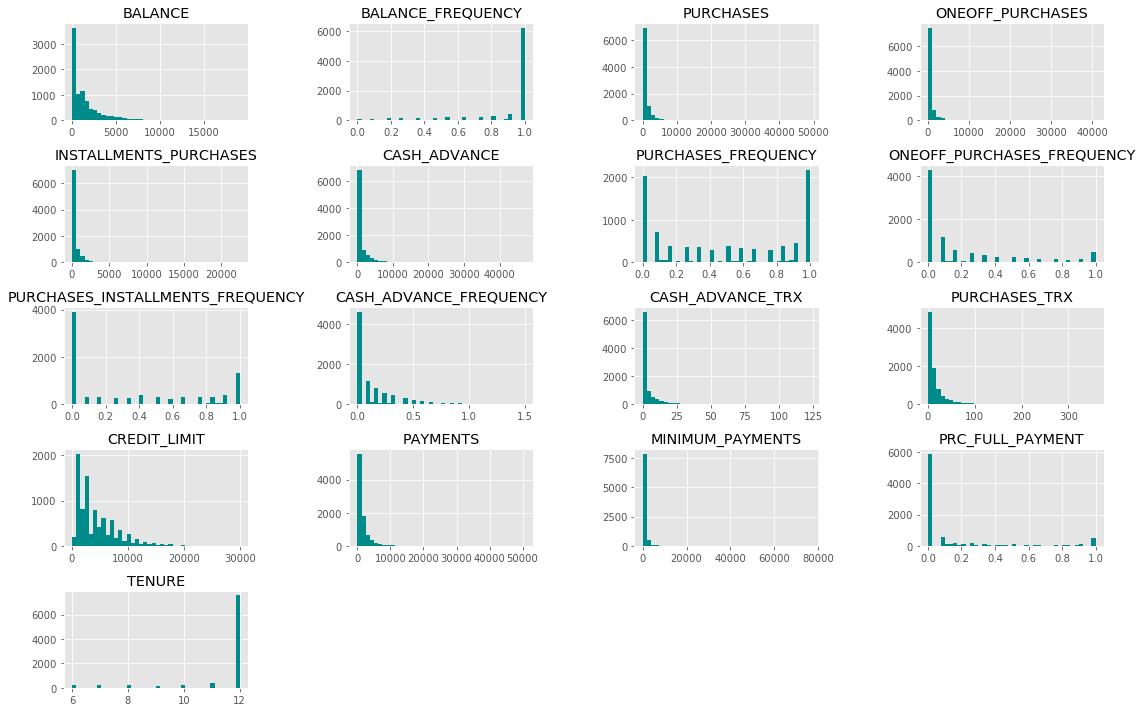

In [4]:
df.hist(color='darkcyan', bins=40); 
plt.tight_layout()

## Dealing with null values

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<b> There is one record with missing 'minimum payment' and 313 records with missing 'credit limit', I just remove these records, since they are not a big part of our data.

In [6]:
#dropping rows with null value for minimum payments 
df = df.dropna(subset=['MINIMUM_PAYMENTS'])

In [7]:
#dropping rows with null value for credit limit
df = df.dropna(subset=['CREDIT_LIMIT'])

### Utilization Ratio

utilization ratio is an important feature and can be estimated for customers using their balance and credit limit.

In [8]:
#adding utilization ratio as a feature
df['UTILIZATION_RATIO']= df['BALANCE']/df['CREDIT_LIMIT']

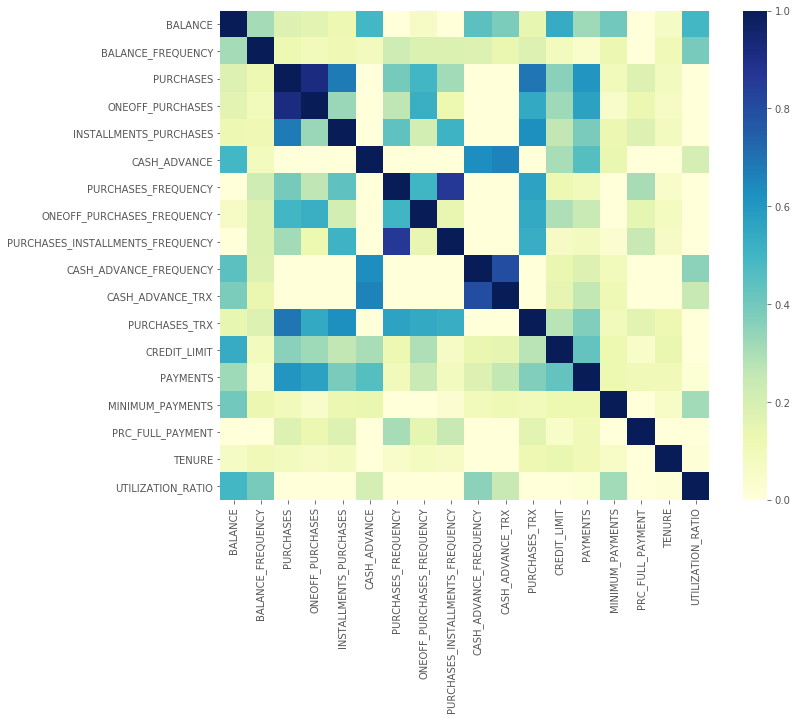

In [9]:
corrmat= df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu")

## Scaling features 

In [10]:
# log transform
df1 = df.copy()
df1 = df1.drop(['CUST_ID'], axis=1)
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX',
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for col in cols:
    df1[col] = df1[col].apply(lambda x : np.log(x) if x >0 else 1)

In [11]:
### Re-visualizing the data

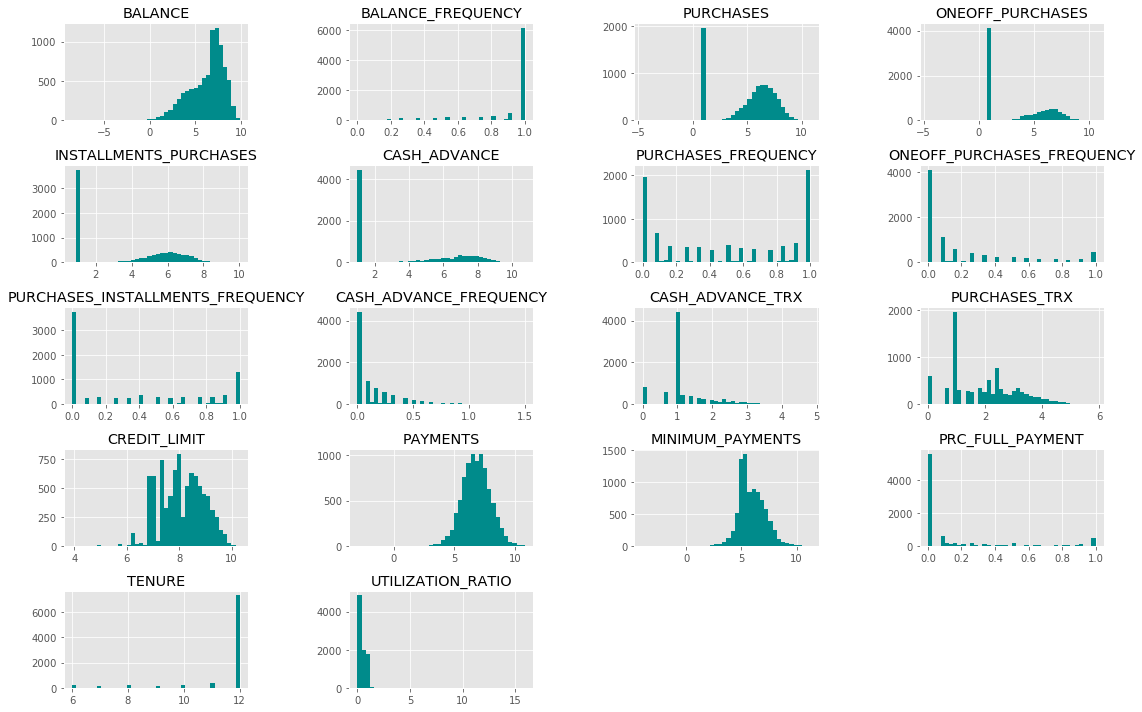

In [12]:
df1.hist(color='darkcyan', bins=40); 
plt.tight_layout()

## Dimension Reduction

### PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Explained Variance is 0.69


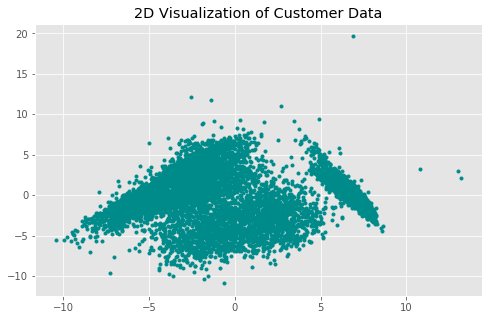

In [14]:
print('Explained Variance is %1.2f'%(np.sum(pca.explained_variance_ratio_)))
plt.subplots(figsize=(8,5))
plt.plot(principalComponents[:,0], principalComponents[:,1], '.', color = 'darkcyan')
plt.title('2D Visualization of Customer Data')
plt.show()

<b> Using PCA and two principal components we can only explain 69% of the variance.

## TSNE

<b>t-SNE (t-distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization.The main advantage of t-SNE is the ability to preserve local structure. This means, roughly, that points which are close to one another in the high-dimensional data set will tend to be close to one another in the chart. t-SNE also produces beautiful looking visualizations.

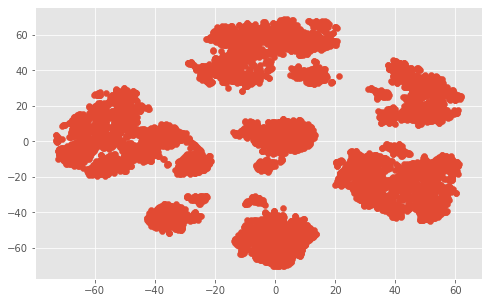

In [15]:
from sklearn.manifold import TSNE
X_tsne = TSNE( perplexity=50, learning_rate=200).fit_transform(df1)
plt.subplots(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

## UMAP

<b> Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.Compared to t-SNE , UMAP does a better job of preserving global structure. it has higher processing speed therefore it is faster.

In [17]:
import umap

In [18]:
embedding = umap.UMAP(n_neighbors=50).fit_transform(df1)
embedding.shape

(8636, 2)

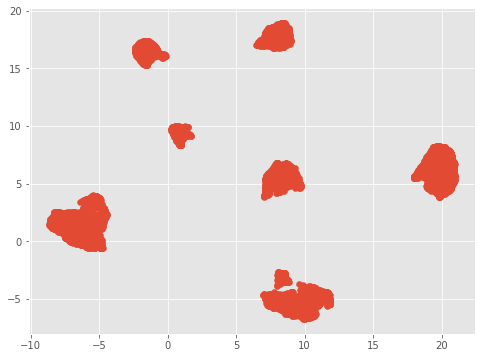

In [19]:
plt.subplots(figsize=(8, 6))
plt.scatter( embedding[:, 0],  embedding[:, 1]);

<b> Using both t-SNE and UMAP for dimensionality reduction , we can see 7 distinct clusters, so we use kNN with k=7.

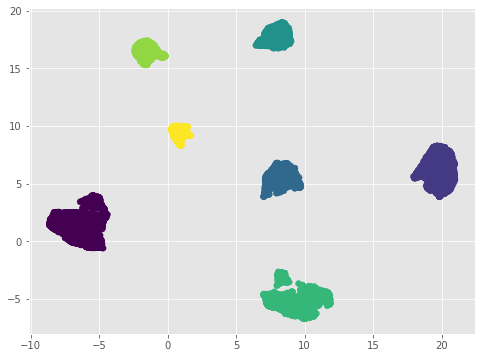

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0)
labels = kmeans.fit_predict(embedding)

fig, ax = plt.subplots(1, figsize=(8,6))
plt.scatter( embedding[:, 0],  embedding[:, 1], c = labels);

## Visualizing features for each cluster

In [21]:
df2 = df.copy()
df2 = df2.drop(['CUST_ID'], axis=1)
df2['cluster'] = labels
cols = df2.columns.to_list()
cols.remove('cluster')

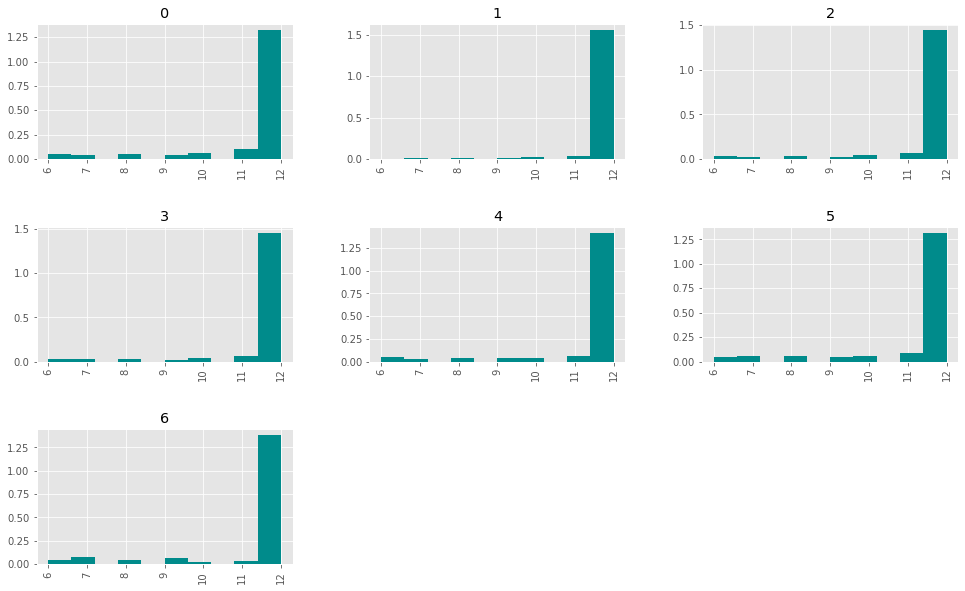

In [22]:
df2['TENURE'].hist(by=df2['cluster'], density=True, color = 'darkcyan');

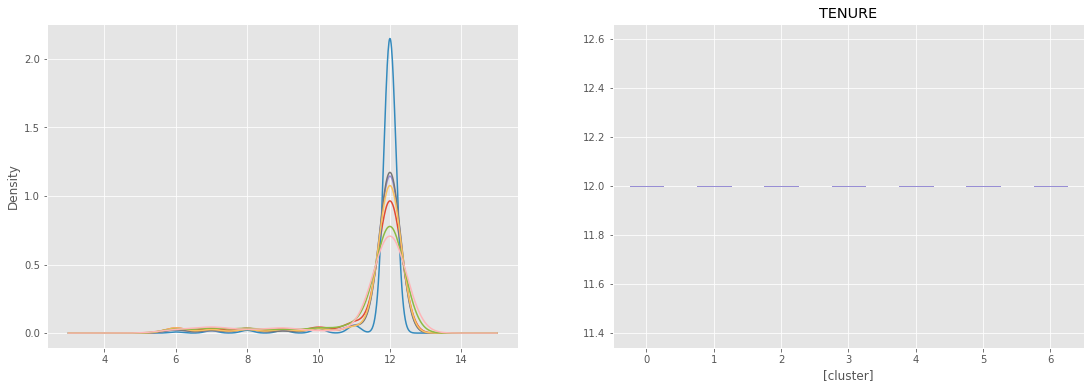

In [23]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0] = df2.groupby('cluster').TENURE.plot(kind='kde', ax=ax[0]);
ax[1] = df2[['TENURE', 'cluster']].boxplot(by="cluster", showfliers=False, ax=ax[1])
plt.suptitle("");

<b>Tenure is not a differentiating factor between clusters

In [24]:
cols.remove('TENURE')

In [25]:
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
        'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
        'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
        'PURCHASES_TRX', 'UTILIZATION_RATIO' 
        ]

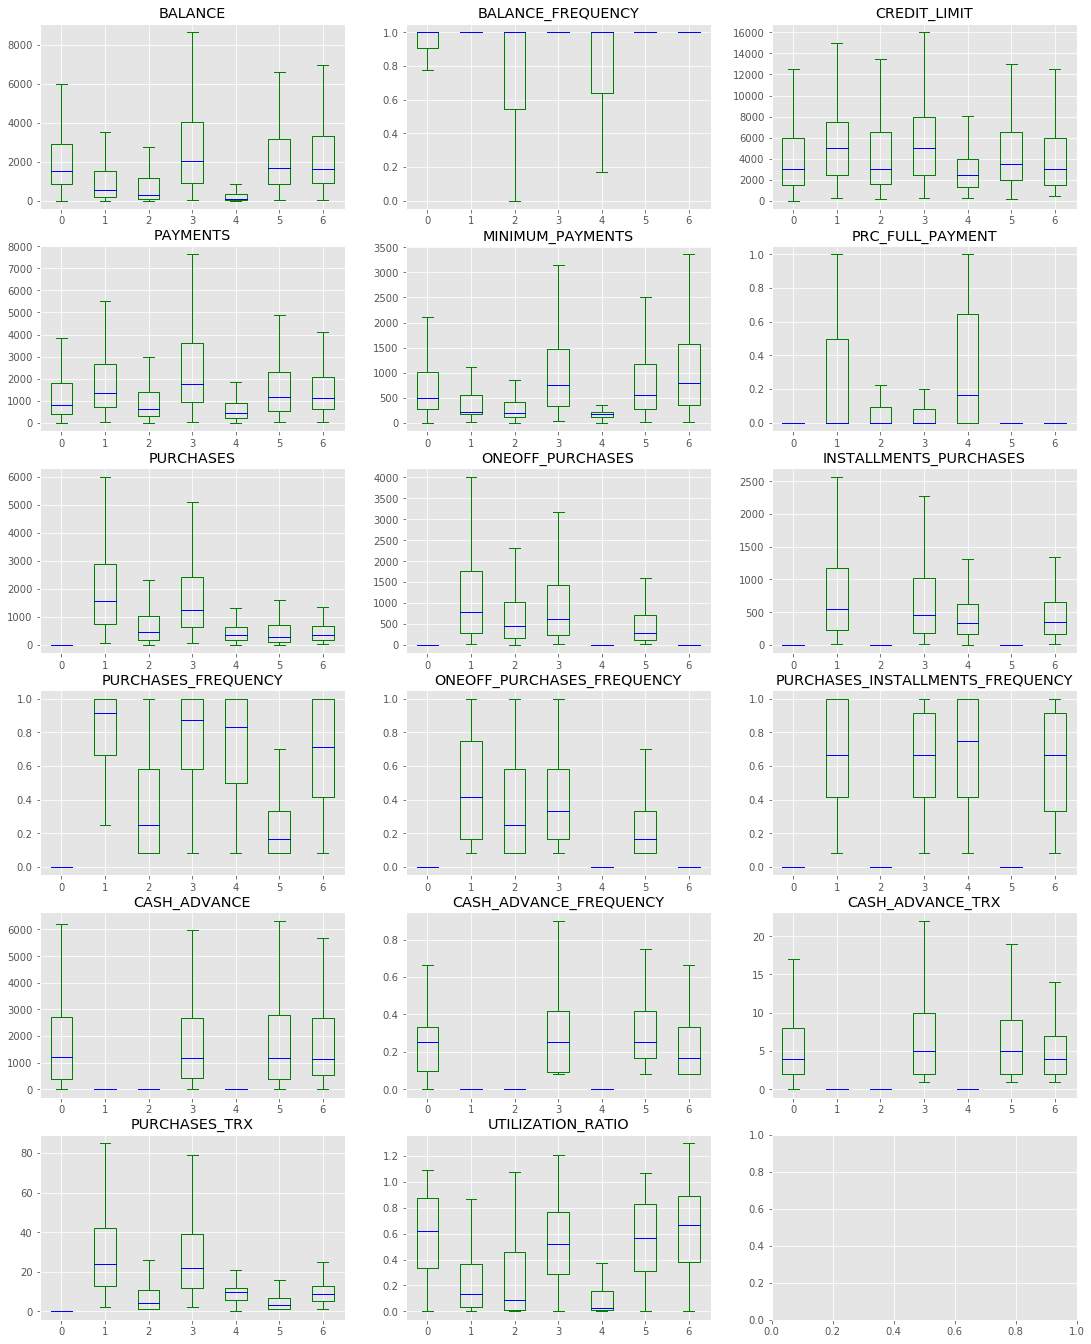

In [26]:
fig, axes = plt.subplots(6,3, sharey=False, figsize=(18,24))
for i, ax in enumerate(fig.axes):
    if i < len(cols):
        df_new = df2[[cols[i], 'cluster']]
        df_new.boxplot(by="cluster", showfliers=False, ax=ax, color=dict(boxes='g', whiskers='g', medians='b', caps='g'),)
        ax.set_xlabel('')
plt.suptitle(""); 

## Number of customers in each cluster

In [38]:
df['cluster'] = labels
df.groupby('cluster').CUST_ID.count()

cluster
0    1985
1    1711
2    1025
3     990
4    1712
5     762
6     451
Name: CUST_ID, dtype: int64

### Average of each feature for each cluster

In [27]:
df2.groupby('cluster').mean().head(7).T

Average of each feature for every cluster:


cluster,0,1,2,3,4,5,6
BALANCE,2211.203644,1222.511343,798.626479,2839.458498,427.114765,2392.849334,2578.701349
BALANCE_FREQUENCY,0.903014,0.939203,0.793756,0.970466,0.823586,0.935652,0.959550
PURCHASES,0.070937,2502.365459,900.058898,1961.955869,555.021939,672.852126,545.789956
ONEOFF_PURCHASES,0.019537,1531.748691,899.975151,1179.012939,0.188861,673.194265,0.162594
INSTALLMENTS_PURCHASES,0.095204,970.645406,0.175385,782.965374,555.893867,0.077375,546.289867
CASH_ADVANCE,2020.833053,0.063665,0.342126,2114.690516,0.142272,2066.709960,2007.242632
PURCHASES_FREQUENCY,0.002149,0.815502,0.365027,0.783421,0.715103,0.279555,0.658200
ONEOFF_PURCHASES_FREQUENCY,0.000931,0.462646,0.364106,0.399252,0.001759,0.278954,0.001663
PURCHASES_INSTALLMENTS_FREQUENCY,0.001259,0.651189,0.001165,0.633905,0.679859,0.000984,0.609798
CASH_ADVANCE_FREQUENCY,0.275692,0.000297,0.000820,0.293997,0.000243,0.300801,0.264009


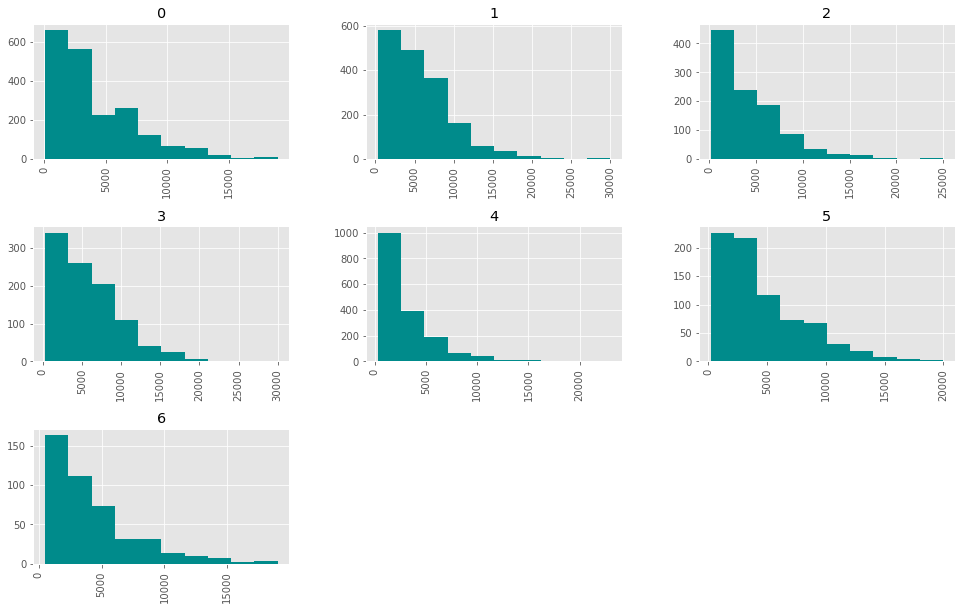

In [29]:
df2['CREDIT_LIMIT'].hist(by=df2['cluster'], color = 'darkcyan', bins=10);

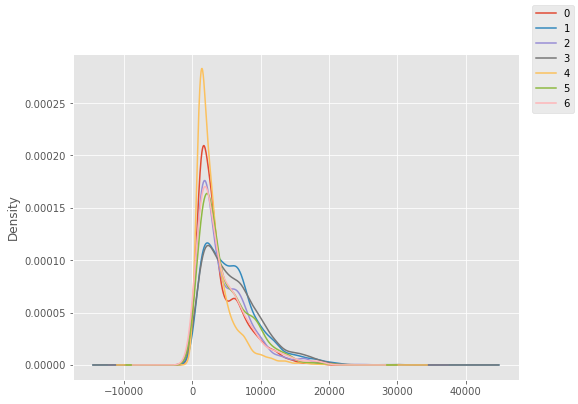

In [30]:
fig, ax = plt.subplots(1, figsize=(8,6))
df2.groupby('cluster').CREDIT_LIMIT.plot(kind='kde', ax=ax);
fig.legend();

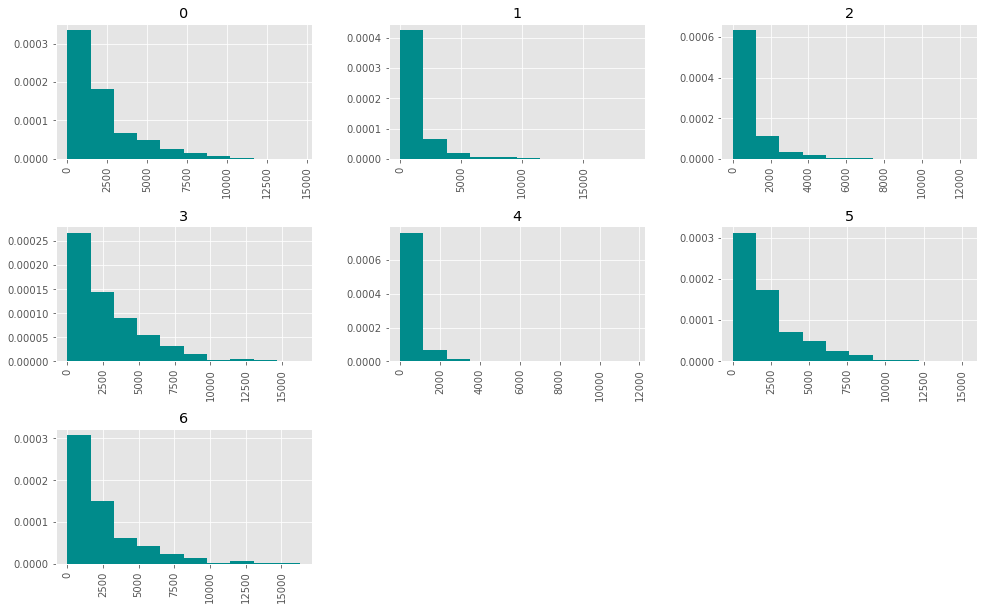

In [40]:
df2['BALANCE'].hist(by=df2['cluster'],density=True, color = 'darkcyan', bins=10);

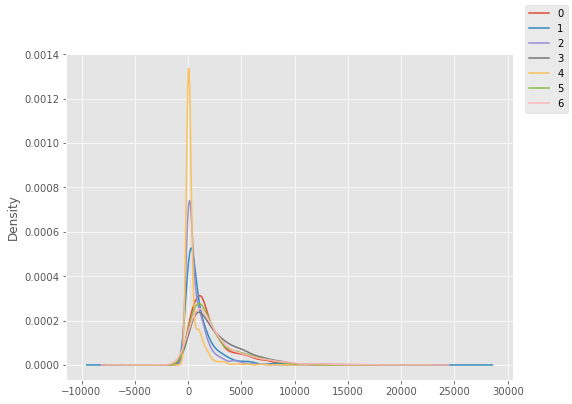

In [41]:
fig, ax = plt.subplots(1, figsize=(8,6))
df2.groupby('cluster').BALANCE.plot(kind='kde', ax=ax);
fig.legend();